**Hasib Uddin**
Student Number: 33747253

I submitted alone

colab link: https://colab.research.google.com/drive/1JdMhwybs_Qg7iR_rIffeyVhZECX1KVTV?usp=sharing

# Part 2




In [1]:
# Import the necessary libraries for data handling, modeling, and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Loading and Preparing the Credit Default Data**

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/datasets/creditdefault_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/datasets/creditdefault_test.csv')

# Separate features and labels
X_train = train_df.drop('Y', axis=1)
y_train = train_df['Y']
X_test = test_df.drop('Y', axis=1)
y_test = test_df['Y']

# Standardize features (important for kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



This section loads the credit default dataset, where 'Y' is the label where 0 = no default and 1 = default.
The features (X_train, X_test) are separated from labels (y_train, y_test) using drop('Y', axis=1).
Standardization scales the features which is crucial for kNN because of its reliance on distance calculations.


**2. Tuning and Evaluating k-Nearest Neighbors (kNN)**

Best kNN params: {'metric': 'manhattan', 'n_neighbors': 19}
Best kNN CV F1-score: 0.8093333333333333


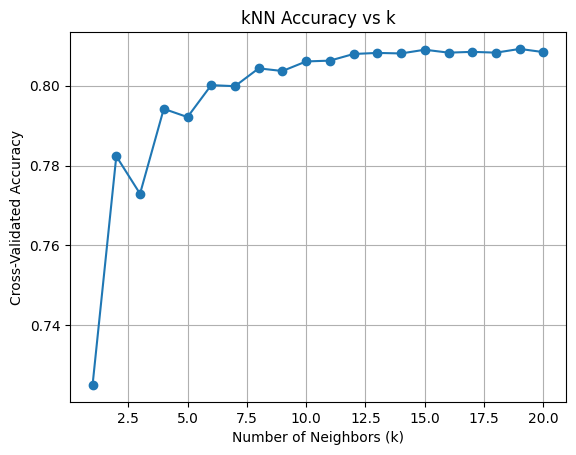

In [4]:
# kNN tuning
param_grid_knn = {'n_neighbors': list(range(1, 21)), 'metric': ['euclidean', 'manhattan']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)
best_knn = grid_search_knn.best_estimator_
print("Best kNN params:", grid_search_knn.best_params_)
print("Best kNN CV F1-score:", grid_search_knn.best_score_)

k_values = list(range(1, 21))
knn_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    knn_scores.append(scores.mean())

# Plot kNN results
plt.figure()
plt.plot(k_values, knn_scores, marker='o')
plt.title('kNN Accuracy vs k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(knn_scores)]
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_knn = knn_final.predict(X_test_scaled)

The kNN is tuned by testing the k from 1 to 20 and two distance metrics, the Euclidean and Manhattan by using GridSearch with cross-validation.
It manually tests k values, plots accuracy vs. k and the final model is trained with the best k from this plot.
Standardization is used again because kNN depends on distances.
Grid search is used to tune the models because it combines hyperparameter search with cross-validation and systematically tests all combinations of  parameters across 5 5 folds of training data.

**3. Tuning and Evaluating Decision Tree**

Best DT params: {'max_depth': 1, 'min_samples_split': 2}
Best DT CV F1-score: 0.8219333333333333


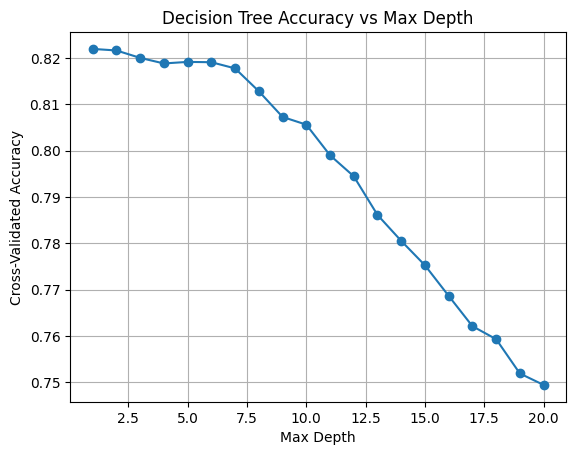

In [5]:
# Decision Tree Tuning
param_grid_dt = {'max_depth': list(range(1, 21)), 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
print("Best DT params:", grid_search_dt.best_params_)
print("Best DT CV F1-score:", grid_search_dt.best_score_)

depths = list(range(1, 21))
dt_scores = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    dt_scores.append(scores.mean())

# Plot Decision Tree results
plt.figure()
plt.plot(depths, dt_scores, marker='o')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

best_depth = depths[np.argmax(dt_scores)]
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)
y_pred_dt = dt_final.predict(X_test)

This section is tuning a Decision Tree by testing max_depth (1 to 20) with a min_samples_split (2, 5, 10) using GridSearchCV, its tests combination whic it finds the best parameters are max_depth=1 and min_samples_split=2.
The depths are tested manually and plotting accuracy.


**4. Tuning and Evaluating Random Forest**

Best RF params: {'max_depth': None, 'n_estimators': 100}
Best RF CV F1-score: 0.47399760080479203


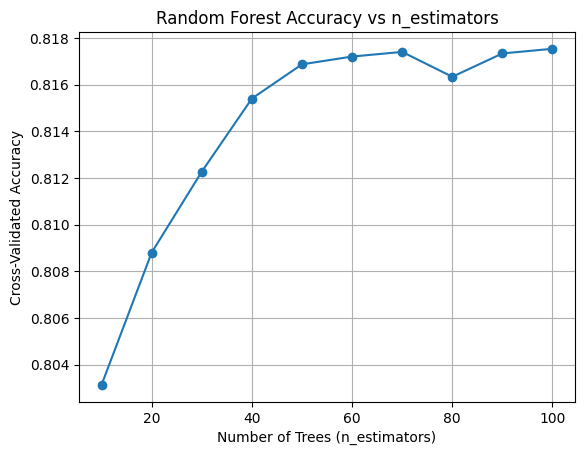

In [6]:
from sklearn.model_selection import GridSearchCV
# Random Forest tuning
param_grid_rf = {'n_estimators': list(range(10, 101, 10)), 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best RF params:", grid_search_rf.best_params_)
print("Best RF CV F1-score:", grid_search_rf.best_score_)

n_estimators_range = list(range(10, 110, 10))
rf_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    rf_scores.append(scores.mean())

# Plot Random Forest results
plt.figure()
plt.plot(n_estimators_range, rf_scores, marker='o')
plt.title('Random Forest Accuracy vs n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

best_n = n_estimators_range[np.argmax(rf_scores)]
rf_final = RandomForestClassifier(n_estimators=best_n, random_state=42)
rf_final.fit(X_train, y_train)
y_pred_rf = rf_final.predict(X_test)

The Random Forest builds decision trees and averages their votes for better accuracy. The n_estimators is the number of trees, max_depth controls each tree’s depth.
GridSearchCV finds that  n_estimators=100 and max_depth=None as the best which suggests a deep forest is optimal.

**5. Model Evaluation Function**

In [7]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print("Accuracy:      ", accuracy_score(y_true, y_pred))
    print("Precision:     ", precision_score(y_true, y_pred))
    print("Recall:        ", recall_score(y_true, y_pred))
    print("F1 Score:      ", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


# Predictions and evaluation
y_pred_knn = best_knn.predict(X_test_scaled)
y_pred_dt = best_dt.predict(X_test)
y_pred_rf = rf_final.predict(X_test)

# Evaluate all models
evaluate_model("kNN (k={})".format(best_k), y_test, y_pred_knn)
evaluate_model("Decision Tree (depth={})".format(best_depth), y_test, y_pred_dt)
evaluate_model("Random Forest (n_estimators={})".format(best_n), y_test, y_pred_rf)


--- kNN (k=19) ---
Accuracy:       0.8084666666666667
Precision:      0.646285338593031
Recall:         0.2962628089210368
F1 Score:       0.40628228972928293

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     11682
           1       0.65      0.30      0.41      3318

    accuracy                           0.81     15000
   macro avg       0.74      0.63      0.65     15000
weighted avg       0.79      0.81      0.78     15000

Confusion Matrix:
 [[11144   538]
 [ 2335   983]]

--- Decision Tree (depth=1) ---
Accuracy:       0.8172666666666667
Precision:      0.6827105763141229
Recall:         0.32489451476793246
F1 Score:       0.44026955278742086

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     11682
           1       0.68      0.32      0.44      3318

    accuracy                           0.82     15000
   macro avg       0

The function checks model’s predictions (y_pred) against true labels (y_true).


*   Accuracy is overall correctness
*   Precision measures if predicted defaults
*   call measures if we catch most defaults
*   F1-score combines them, giving a single number







In [8]:
# Model selection based on F1-score
f1_scores = {
    "kNN": f1_score(y_test, y_pred_knn),
    "Decision Tree": f1_score(y_test, y_pred_dt),
    "Random Forest": f1_score(y_test, y_pred_rf)
}
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"\nBest Model: {best_model_name}")
print(f"Test Set F1-Scores: {f1_scores}")
print("""Justification: The F1-score is chosen because it balances precision and recall, which is crucial for credit default prediction where both false positives and false negatives carry significant costs. Given there is potential class imbalance the F1-score provides a better measure of model performance than accuracy.
""")


Best Model: Random Forest
Test Set F1-Scores: {'kNN': 0.40628228972928293, 'Decision Tree': 0.44026955278742086, 'Random Forest': 0.4703414075910738}
Justification: The F1-score is chosen because it balances precision and recall, which is crucial for credit default prediction where both false positives and false negatives carry significant costs. Given potential class imbalance, F1-score provides a better measure of model performance than accuracy.



In [9]:
cv_f1_scores = {
    "kNN": grid_search_knn.best_score_,
    "Decision Tree": grid_search_dt.best_score_,
    "Random Forest": grid_search_rf.best_score_
}
best_model_name = max(cv_f1_scores, key=cv_f1_scores.get)
print(f"Best Model based on CV F1-score: {best_model_name}")

Best Model based on CV F1-score: Decision Tree


**6. Optimizing Threshold for the Best Model**

In [10]:
if best_model_name == "kNN":
    best_model = best_knn
    X_test_best = X_test_scaled
elif best_model_name == "Decision Tree":
    best_model = best_dt
    X_test_best = X_test
elif best_model_name == "Random Forest":
    best_model = best_rf
    X_test_best = X_test
y_pred_best = best_model.predict(X_test_best)
evaluate_model(best_model_name, y_test, y_pred_best)


--- Decision Tree ---
Accuracy:       0.8172666666666667
Precision:      0.6827105763141229
Recall:         0.32489451476793246
F1 Score:       0.44026955278742086

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     11682
           1       0.68      0.32      0.44      3318

    accuracy                           0.82     15000
   macro avg       0.76      0.64      0.67     15000
weighted avg       0.80      0.82      0.79     15000

Confusion Matrix:
 [[11181   501]
 [ 2240  1078]]


We predict test labels with all the models tuned : kNN , Decision Tree, and Random Forest.
In this case Random Forest wins on test F1 (0.47), this means Random Forest balances catching defaults and avoiding false positives best. However decision tree is the best at CV score on (0.82).


In [11]:
from sklearn.metrics import precision_recall_curve

if best_model_name == "kNN":
    y_prob = best_knn.predict_proba(X_test_scaled)[:, 1]
elif best_model_name == "Decision Tree":
    y_prob = best_dt.predict_proba(X_test)[:, 1]
elif best_model_name == "Random Forest":
    y_prob = rf_final.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores_curve = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores_curve)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold for {best_model_name}: {optimal_threshold}")

Optimal Threshold for Decision Tree: 0.708575112830432


This section fine-tunes the best models decision cutoff to predict credit defaults (1) or non-defaults (0) by finding the point that maximizes the F1-score. It uses all the probabilties from the model, tests all possible thresholds, calculates F1 for each, and picks the best one. This is important becuase the dataset is imbalanced since there are more 0s than 1s, so a custom threshold improves performance for the minority class which are the defaults.

> Add blockquote



**7. Checking Class Distribution**

In [12]:
print("Training set class distribution:", y_train.value_counts(normalize=True))
print("Test set class distribution:", y_test.value_counts(normalize=True))

Training set class distribution: Y
0    0.7788
1    0.2212
Name: proportion, dtype: float64
Test set class distribution: Y
0    0.7788
1    0.2212
Name: proportion, dtype: float64
